# An investigation on the Titanic data set

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from ggplot import *
%matplotlib inline

In [6]:
titanic = pd.read_csv('https://raw.githubusercontent.com/Linhnguyen14/stick/master/titanic/train.csv')

# The questions:

Disclaimer: this is an academic investigation, any finding should be taken with a grain of salt.

This investigation shall focus on identify some of the factor that might affect survival:
- Gender vs survival
- Cabin vs survival
- Age and Passenger class vs survival

# Gender:

In [7]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Women had always been priotized, because their survival ensured the survival of the nation/ culture/ family. 
Therefore, it's not going to be a surprised, if more women survived than men.
Still, that was just an assumption. Let's us look at the data first.

In [8]:
# A function that will return the survival rate for a specified categorical variable.
def survival_group(datain, dataout, type):
    datacount = datain.groupby(type)["Survived"].count().reset_index()
    datasum = datain.groupby(type)["Survived"].sum().reset_index()
    dataout = datasum.merge(datacount, on = type)
    dataout["survival_rate"] = dataout['Survived_x'] / dataout['Survived_y']
    dataout.columns = ['group', 'survived', 'total', "survival_rate"]
    return dataout

survival_gender =[]
survival_gender = survival_group(titanic,survival_gender, "Sex")
survival_gender

,group,survived,total,survival_rate
0,female,233,314,0.742038
1,male,109,577,0.188908


Okay, so the hunch was correct, the male's survival rate is indeed much lower than female's.


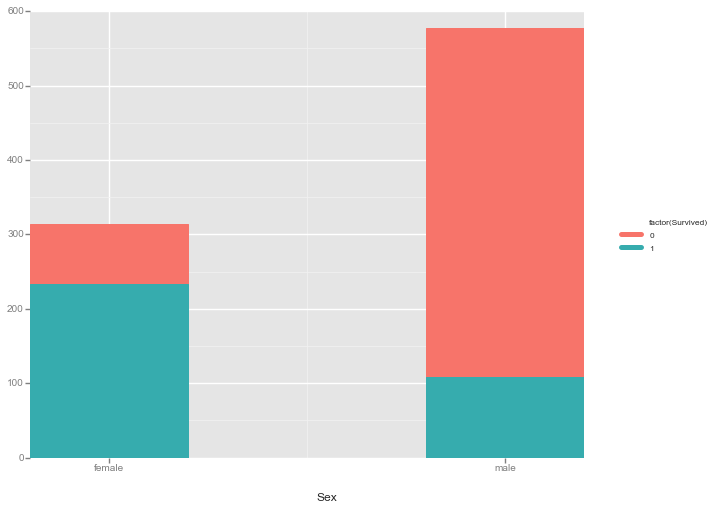

<ggplot: (8829043)>

In [9]:
ggplot(aes(x = "Sex", fill = "factor(Survived)"), data = titanic) + geom_bar(position = 'stack')

# Cabin

Another idea is that, perhaps, the location of the cabin does have something to do with the survival rate.
The cabin is constructed by a string and some digits. The string stood for the section, while the digit specified the exact location of the cabin inside that section.

Therefore, we shall extract the first letter of the cabin, and look at them in a whole, to see if there was any insights.

Some people traveled in group, and it's alright to neglect them, since they will most likely be staying close together anyway.

In [10]:
# Remove all the NaN rows in the cabin column
titanic_cabin = titanic[pd.notnull(titanic['Cabin'])]

# Subset the cabin and and the survived data, since that's all we need
titanic_section = titanic_cabin[["Survived","Cabin"]]

# A function that will return the first character of the input.
def first_letter(stringin):
    return stringin[0]

# Create a new column section, which will contain the first letter in cabin.
titanic_section.loc[:,("section")] = titanic_section.loc[:,("Cabin")].apply(first_letter)
titanic_section.head()

E:\Work\Education\Anacondaa\lib\site-packages\pandas\core\indexing.py:288: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
E:\Work\Education\Anacondaa\lib\site-packages\pandas\core\indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Survived,Cabin,section
1,1,C85,C
3,1,C123,C
6,0,E46,E
10,1,G6,G
11,1,C103,C


In [11]:
# Call the function survival_group defined earlier, to get the survival rate for each section
survival_cabin = []
survival_cabin = survival_group(titanic_section,survival_cabin, "section")
survival_cabin

,group,survived,total,survival_rate
0,A,7,15,0.466667
1,B,35,47,0.744681
2,C,35,59,0.593220
3,D,25,33,0.757576
4,E,24,32,0.750000
5,F,8,13,0.615385
6,G,2,4,0.500000
7,T,0,1,0.000000


Indeed, section does have something to do with survival rate. People from section B, D and E do have a higher survival rate.

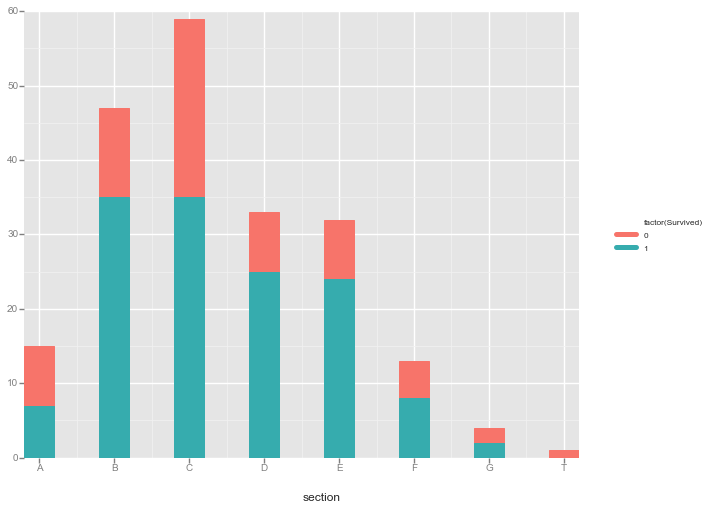

<ggplot: (8829059)>

In [12]:
ggplot(aes(x = "section", fill = "factor(Survived)"), data = titanic_section) + geom_bar(position = 'stack')

# AGE

A first class ticket will be more likely to save you, than strength of youth.

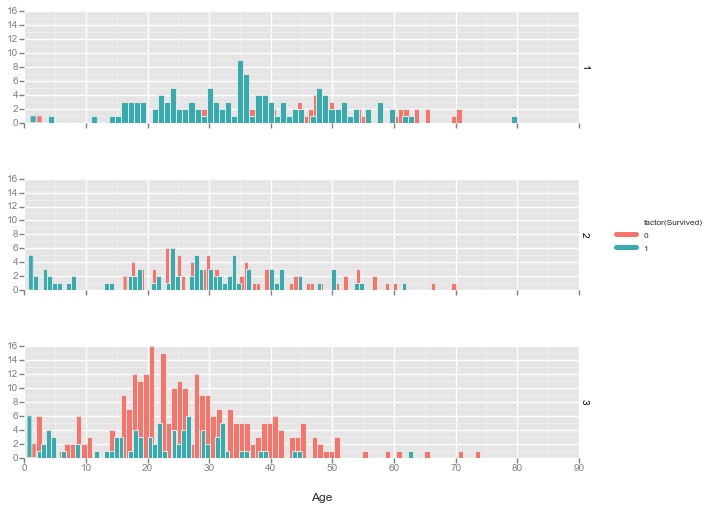

<ggplot: (11835793)>

In [13]:
ggplot(aes(x = "Age", fill = "factor(Survived)"), data = titanic) +\
geom_histogram(bins = 80) +\
facet_grid("Pclass") 

# Conclusion:

The factor that might affect survivability:
- Gender, specifically female are more likely to survive.
- Cabin, there is some trend here that might be worth further investigation.
- Passenger class, where higher class are more likely to survive.


Disclaimer: this is an academic investigation, any finding should be taken with a grain of salt.
